# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tarisha Syira Mazaya Putri
- **Email:** tarishamazaya@gmail.com
- **ID Dicoding:** tarishamazaya

## Menentukan Pertanyaan Bisnis

- Bagaimana performa persewaan sepeda dalam tahun 2011 dan 2012?
- Bagaimana distribusi penyewaan sepeda perjamnya dalam sehari?
- Saat musim apa, persewaan sepeda memiliki jumlah penyewa terbanyak?
- Pada kondisi cuaca seperti apa orang cenderung melakukan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1072]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [1073]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1074]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Checking data type

In [1075]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa terdapat kesalahan penulisan tipe data pada `dteday` = object. Diperlukan perbaikan tipe data pada `dteday` object -> datetime.

In [1076]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terlihat bahwa terdapat kesalahan penulisan tipe data pada `dteday` = object. Diperlukan perbaikan tipe data pada `dteday` object -> datetime.

#### Checking missing value

In [1077]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada `day_df`

In [1078]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada `hour_df`

#### Checking duplicates

In [1079]:
print("Jumlah duplikat: ",day_df.duplicated().sum())

Jumlah duplikat:  0


Tidak ditemukan data yang terduplikat pada `day_df`

In [1080]:
print("Jumlah duplikat: ",hour_df.duplicated().sum())

Jumlah duplikat:  0


Tidak ditemukan data yang terduplikat pada `day_df`

#### Re-checking

In [1081]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [1082]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ditemukan keanehan lain di `day_df` dan `hour_df`

### Cleaning Data

#### Drop column
- Menghapus kolom `instant` karena hanya merupakan kolom index

In [1083]:
day_df.drop('instant', axis=1, inplace=True)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [1084]:
hour_df.drop('instant', axis=1, inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Change data type

In [1085]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [1086]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Tipe data pada `dteday` telah terganti menjadi datetime

#### Mapping detail data
- Mengubah data categorical(angka) -> menjadi keterangan yang sesuai dengan readme

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1: January, 2: February, dst)
- weekday : (0: Sunday, 1: Monday, dst)
- weathersit : 
	- 1: Clear/Partly cloudy
	- 2: Mist
	- 3: Light Snow/Light Rain 
	- 4: Heavy Rain/Ice Pallets

In [1087]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_map = {0: 2011, 1: 2012}
mnth_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'} 
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}  
weathersit_map = {
    1: 'Clear/Partly cloudy',
    2: 'Mist',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Ice Pallets'
}

day_df['season'] = day_df['season'].map(season_map)
day_df['yr'] = day_df['yr'].map(yr_map)
day_df['mnth'] = day_df['mnth'].map(mnth_map)
day_df['weekday'] = day_df['weekday'].map(weekday_map)
day_df['weathersit'] = day_df['weathersit'].map(weathersit_map)

day_df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [1088]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_map = {0: 2011, 1: 2012}
mnth_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'} 
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}  
weathersit_map = {
    1: 'Clear/Partly cloudy',
    2: 'Mist',
    3: 'Light Snow/Light Rain',
    4: 'Heavy Rain/Ice Pallets'
}

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['yr'] = hour_df['yr'].map(yr_map)
hour_df['mnth'] = hour_df['mnth'].map(mnth_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_map)

hour_df.head(3)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Partly cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Partly cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Partly cloudy,0.22,0.2727,0.80,0.0,5,27,32


Terlihat data semakin mudah untuk dibaca

## Exploratory Data Analysis (EDA)

### Explore day_df

Dilakukan eksplorasi terhadap, `yr` untuk mengetahui penyewa lebih banyak di tahun 2011 atau 2012

In [1089]:
day_df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max  min         mean      sum
yr                                   
2011  6043  431  3405.761644  1243103
2012  8714   22  5599.934426  2049576

Terlihat bahwa, tahun 2012 memiliki rata-rata dan jumlah terbanyak sehingga dapat disimpulkan penyewa terbanyak ada di tahun 2012

In [1090]:
day_df.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                   
         max   min         mean
season                         
Fall    8714  1115  5644.303191
Spring  7836   431  2604.132597
Summer  8362   795  4992.331522
Winter  8555    22  4728.162921

Terlihat bahwa, para penyewa sepeda lebih suka bersepeda pada musim gugur dilihat dari meannya. Lalu, paling sedikit jatuh di musim semi dengan mean paling sedikit.

### Explore hour_df

Untuk mengetahui distribusi penyewa sepeda tiap jamnya dalam 1 hari

In [1091]:
hour_df.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

Terlihat bahwa, para penyewa sepeda terbanyak ada di rentang pk. 17.00-18.00. Lalu, paling sepi berada pada pk. 04.00.

### Explore day_df & hour_df

In [1092]:
bike_share_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday",
    suffixes=('_hour', '_day')
)

bike_share_df

,dteday,season_hour,yr_hour,mnth_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,...,Saturday,0,Clear/Partly cloudy,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,...,Saturday,0,Clear/Partly cloudy,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,...,Saturday,0,Clear/Partly cloudy,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,...,Saturday,0,Clear/Partly cloudy,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,...,Saturday,0,Clear/Partly cloudy,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,December,0,Monday,1,Mist,0.215833,0.223487,...,Monday,1,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,Spring,2012,December,0,Monday,1,Mist,0.215833,0.223487,...,Monday,1,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,Spring,2012,December,0,Monday,1,Mist,0.215833,0.223487,...,Monday,1,Clear/Partly cloudy,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,Spring,2012,December,0,Monday,1,Mist,0.215833,0.223487,...,Monday,1,Clear/Partly cloudy,0.26,0.2727,0.56,0.1343,13,48,61


Menggabungkan dataset `day_df` dan `hour_df` berdasarkan `dteday` menggunakan inner join untuk mendapat data persewaan sepeda lengkapnya

In [1093]:
bike_share_df.to_csv('dashboard/merged_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa persewaan sepeda dalam tahun 2011 dan 2012?

C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\434682343.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = bike_share_df.groupby(by=["mnth_day", "yr_day"]).agg({


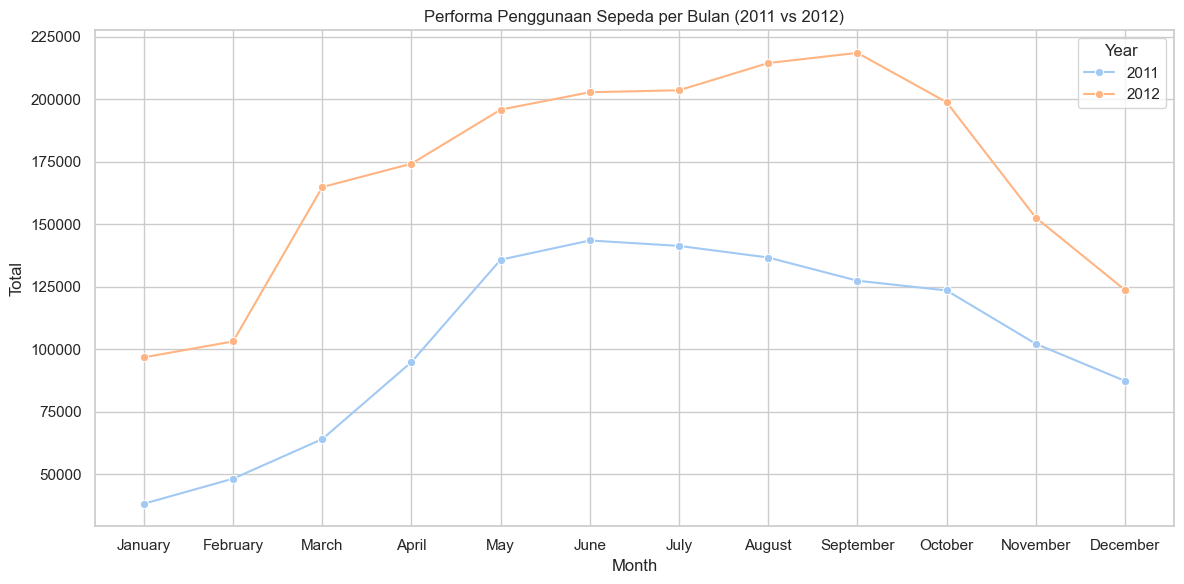

In [1094]:
bike_share_df['mnth_day'] = pd.Categorical(bike_share_df['mnth_day'], categories=
    ['January','February','March','April','May','June','July','August','September','October','November','December'],
    ordered=True)

monthly_counts = bike_share_df.groupby(by=["mnth_day", "yr_day"]).agg({
    "cnt_day": "sum"
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_counts,
    x="mnth_day",
    y="cnt_day",
    hue="yr_day",
    palette="pastel",
    marker="o"
)

plt.title("Performa Penggunaan Sepeda per Bulan (2011 vs 2012)")
plt.xlabel("Month")
plt.ylabel("Total")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()

plt.show()

Berdasarkan visualisasi menggunakan line plot, dapat disimpulkan bahwa tahun 2012 unggul dalam jumlah persewaan sepeda dibandingkan dengan tahun 2011. Puncak penyewaan sepeda terjadi pada bulan September di tahun 2012, sementara bulan yang paling sepi adalah Januari. Lalu, pada tahun 2011, puncak penyewaan sepeda terjadi pada bulan Juni dan bulan Januari jumlah penyewaan sepeda yang paling rendah.

### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda perjamnya dalam sehari?

C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\3779886777.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt_day', data=bike_share_df, ci=None)


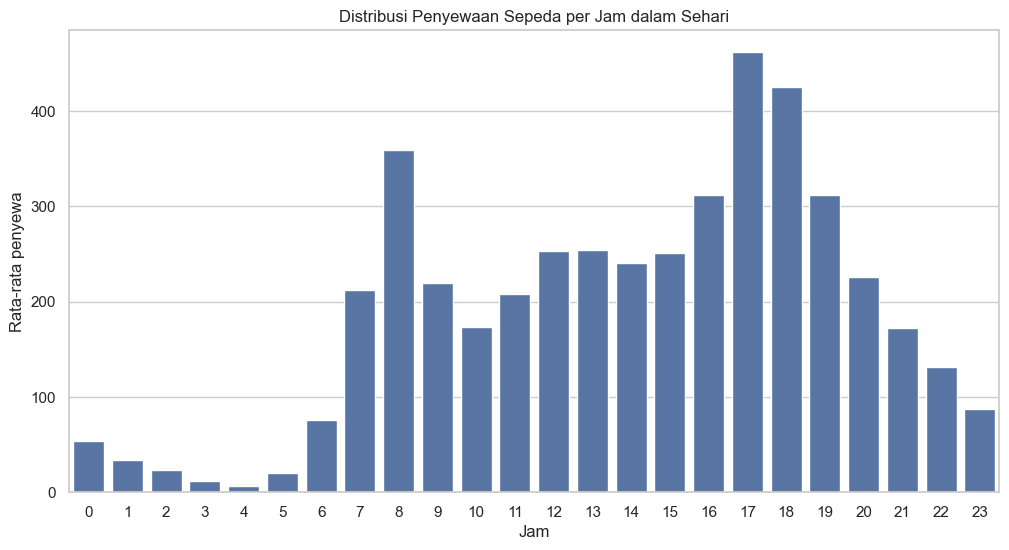

In [1095]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt_day', data=bike_share_df, ci=None)

# Menambahkan label dan judul
plt.title('Distribusi Penyewaan Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata penyewa')

# Menampilkan plot
plt.show()

Berdasarkan bar plot, dapat diambil kesimpulan bahwa puncak penyewaan sepeda terjadi pada rentang waktu pukul 17.00-18.00 dalam sehari. Sebaliknya, pada pukul 04.00, terjadi tingkat penyewaan sepeda yang paling rendah.

### Pertanyaan 3: Saat musim apa, persewaan sepeda memiliki jumlah penyewa terbanyak?

C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\1113060972.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season_day', y='cnt_day', data=bike_share_df, palette='viridis', ci=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\1113060972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_day', y='cnt_day', data=bike_share_df, palette='viridis', ci=None)


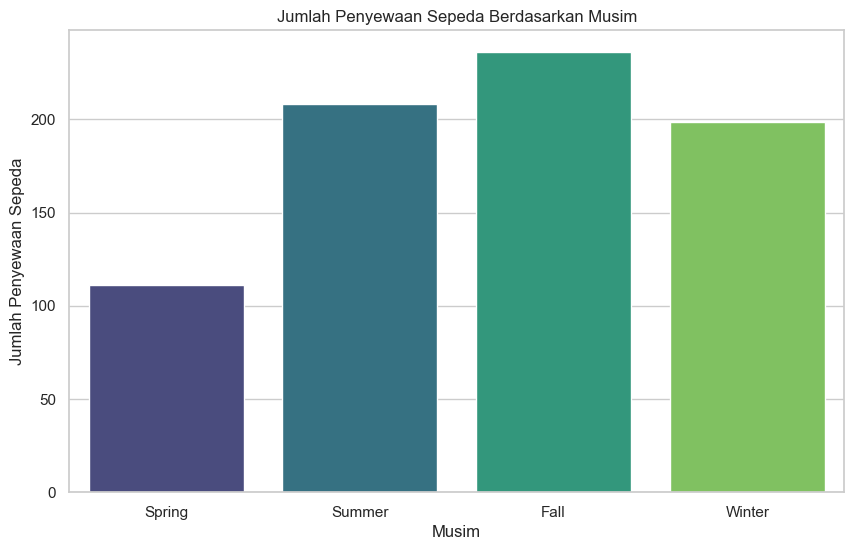

In [1096]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season_day', y='cnt_day', data=bike_share_df, palette='viridis', ci=None)

plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')

plt.show()

Berdasarkan visualisasi data, dapat diambil kesimpulan bahwa rata-rata orang paling suka menyewa sepeda pada musim gugur. Sebaliknya, persewaan sepeda cenderung sepi disaat musim semi.

### Pertanyaan 4: Pada kondisi cuaca seperti apa orang cenderung melakukan penyewaan sepeda?

C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\1186091092.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit_day', y='cnt_day', data=bike_share_df, palette='pastel', ci=None)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19584\1186091092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit_day', y='cnt_day', data=bike_share_df, palette='pastel', ci=None)


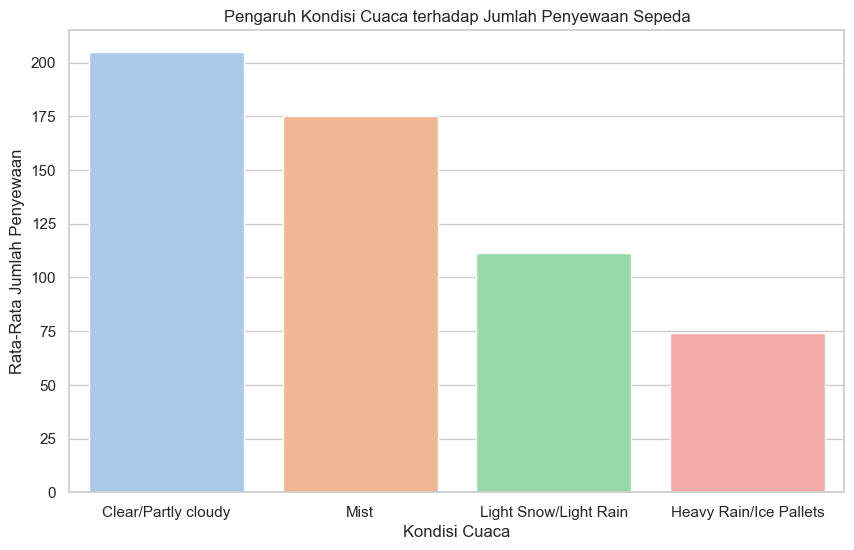

In [1097]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_day', y='cnt_day', data=bike_share_df, palette='pastel', ci=None)

# Menambahkan label dan judul
plt.title('Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan')

# Menampilkan plot
plt.show()

Berdasarkan visualisasi data, dapat diambil kesimpulan bahwa rata-rata orang paling suka menyewa sepeda pada kondisi cuaca yang cerah/berawan. Sebaliknya, persewaan sepeda cenderung sepi disaat cuaca ekstrem seperti hujan lebat/hujan es.

## Conclusion

- Bagaimana performa persewaan sepeda dalam tahun 2011 dan 2012?
    - Performa yang ditunjukan terlihat bahwa, persewaan sepeda lebih unggul di tahun 2012 khususnya bulan September
- Bagaimana distribusi penyewaan sepeda perjamnya dalam sehari?
    - Persewaan sepeda paling ramai rentang pk.17.00-18.00. Paling sepi pk.04.00
- Saat musim apa, persewaan sepeda memiliki jumlah penyewa terbanyak?
    - Jumlah penyewa terbanyak jatuh pada musim gugur
- Pada kondisi cuaca seperti apa orang cenderung melakukan penyewaan sepeda?
    - Orang-orang cenderung menyewa sepeda disaat kondisi cuaca sengan cerah/berawan